## 텍스트 분석
- 트위터 데이터 중 평점이 있는 데이터를 통해 형태소 분석을 진행

In [1]:
import pandas as pd 
survey = pd.read_csv(r'C:\Users\rsh73\Desktop\survey_설문지.csv')

In [2]:
survey

,datetime,comment,satisfaction
0,2019-03-11,역앞에 젊은이들이 모여있다(AA역),1
1,2019-02-25,운동할 수 있는 장소가 있는 것이 좋다,5
2,2019-02-18,육아 지원이 좋다,5
3,2019-04-09,어린이집에 바로 입원할 수 있다(대기아동 없음),4
4,2019-01-06,역앞 상가가 쓸쓸하다,2
...,...,...,...
81,2019-01-21,초등학교 운동장이 잔디밭이라서 아주 좋다,5
82,2019-04-30,홈페이지에서도 설문지를 투고할 수 있게 해 달라,2
83,2019-01-09,공원에 놀이기구가 너무 적다,1
84,2019-03-09,공원을 더 늘렸으면 좋겠다,2


In [3]:
#결측값이 있는지 확인하기
survey.isna().sum()

datetime        0
comment         2
satisfaction    0
dtype: int64

In [4]:
#comment의 결측값 제거하기
survey = survey.dropna()

In [5]:
# comment의 글자수 추가하기
survey['len'] = survey['comment'].str.len()

C:\Users\rsh73\AppData\Local\Temp\ipykernel_19052\1032698228.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey['len'] = survey['comment'].str.len()


In [6]:
survey

,datetime,comment,satisfaction,len
0,2019-03-11,역앞에 젊은이들이 모여있다(AA역),1,19
1,2019-02-25,운동할 수 있는 장소가 있는 것이 좋다,5,21
2,2019-02-18,육아 지원이 좋다,5,9
3,2019-04-09,어린이집에 바로 입원할 수 있다(대기아동 없음),4,26
4,2019-01-06,역앞 상가가 쓸쓸하다,2,11
...,...,...,...,...
81,2019-01-21,초등학교 운동장이 잔디밭이라서 아주 좋다,5,22
82,2019-04-30,홈페이지에서도 설문지를 투고할 수 있게 해 달라,2,26
83,2019-01-09,공원에 놀이기구가 너무 적다,1,15
84,2019-03-09,공원을 더 늘렸으면 좋겠다,2,14


In [7]:
survey.describe()

,satisfaction,len
count,84.000000,84.000000
mean,2.619048,20.119048
std,1.463654,10.355611
min,1.000000,6.000000
25%,1.000000,12.000000
50%,2.000000,19.000000
75%,4.000000,24.500000
max,5.000000,62.000000


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([19., 18., 21., 11.,  7.,  3.,  3.,  1.,  0.,  1.]),
 array([ 6. , 11.6, 17.2, 22.8, 28.4, 34. , 39.6, 45.2, 50.8, 56.4, 62. ]),
 <BarContainer object of 10 artists>)

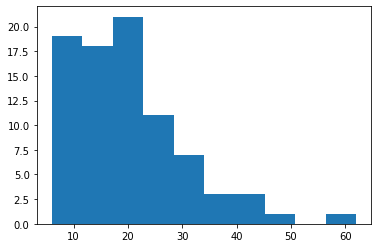

In [9]:
plt.hist(survey['len']) # 히스토그램을 그려 글자수별 분포를 알아보기

In [10]:
survey.value_counts() #고윳값 개수를 반환

datetime    comment                         satisfaction  len
2019-01-01  관광 명소가 없다                       1             9      1
2019-03-16  동물원이 있으면 좋겠다                    3             12     1
2019-03-28  겨울철 노면동결로 사고가 많다. 처리해주세요        1             24     1
2019-03-24  지난달 직원 비리의혹에 대해 좀 더 자세히 설명해 달라  1             30     1
            관공서가 토요일일요일도 열리면 좋겠다            5             20     1
                                                                ..
2019-02-13  관공서 출장소를 역전에 지어 주었으면 한다         3             23     1
2019-02-12  상가를 좀 더 활기차게 만들었으면 좋겠다.         4             23     1
2019-02-11  달리기같은 운동할 수 있는 장소가 많다.          5             22     1
2019-02-07  워킹맘의 지원을 더 늘렸으면 좋겠다             2             19     1
2019-04-30  홈페이지에서도 설문지를 투고할 수 있게 해 달라      2             26     1
Length: 84, dtype: int64

In [11]:
survey['comment'] = survey['comment'].str.replace('AA','') # AA역의 AA를 공백으로 바꿔주기

C:\Users\rsh73\AppData\Local\Temp\ipykernel_19052\279950437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey['comment'] = survey['comment'].str.replace('AA','') # AA역의 AA를 공백으로 바꿔주기


In [12]:
survey['comment'] = survey['comment'].str.replace('\(.+?\)','') # 특수문자를 공백으로 바꿔주기

C:\Users\rsh73\AppData\Local\Temp\ipykernel_19052\1875801664.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  survey['comment'] = survey['comment'].str.replace('\(.+?\)','') # 특수문자를 공백으로 바꿔주기
C:\Users\rsh73\AppData\Local\Temp\ipykernel_19052\1875801664.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey['comment'] = survey['comment'].str.replace('\(.+?\)','') # 특수문자를 공백으로 바꿔주기


In [13]:
survey

,datetime,comment,satisfaction,len
0,2019-03-11,역앞에 젊은이들이 모여있다,1,19
1,2019-02-25,운동할 수 있는 장소가 있는 것이 좋다,5,21
2,2019-02-18,육아 지원이 좋다,5,9
3,2019-04-09,어린이집에 바로 입원할 수 있다,4,26
4,2019-01-06,역앞 상가가 쓸쓸하다,2,11
...,...,...,...,...
81,2019-01-21,초등학교 운동장이 잔디밭이라서 아주 좋다,5,22
82,2019-04-30,홈페이지에서도 설문지를 투고할 수 있게 해 달라,2,26
83,2019-01-09,공원에 놀이기구가 너무 적다,1,15
84,2019-03-09,공원을 더 늘렸으면 좋겠다,2,14


In [14]:
from konlpy.tag import Twitter

In [15]:
twt = Twitter()
text = "우와! 데이터분석은 어려우면서도 흥미로우면서도 신기해! 열심히 공부합시다...화이팅?!"
tagging = twt.pos(text) # 형태소와 품사 모두 추출해준다.
tagging

c:\users\rsh73\appdata\local\programs\python\python39\lib\site-packages\konlpy\tag\_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


[('우와', 'Exclamation'),
 ('!', 'Punctuation'),
 ('데이터', 'Noun'),
 ('분석', 'Noun'),
 ('은', 'Josa'),
 ('어려우면서도', 'Verb'),
 ('흥미로우면서도', 'Adjective'),
 ('신기해', 'Adjective'),
 ('!', 'Punctuation'),
 ('열심히', 'Adverb'),
 ('공부', 'Noun'),
 ('합시다', 'Verb'),
 ('...', 'Punctuation'),
 ('화이팅', 'Noun'),
 ('?!', 'Punctuation')]

In [25]:
all_words = []
parts = ['Noun']
for n in range(len(survey)):
    text = survey['comment'].iloc[n] #comment 리뷰를 가지고 온다
    words = twt.pos(text)
    words_arr = []
    for i in words:
        if i =='EOS'or i=="": continue
        word_tmp =i[0]
        part = i[1] # 품사
        if not (part in parts):continue
        words_arr.append(word_tmp)
    all_words.extend(words_arr)
print(all_words) # 명사만 따로 추출하기

['역앞', '젊은이', '운동', '수', '장소', '것', '육아', '지원이', '어린이집', '바로', '입원', '수', '역앞', '상가', '생활', '놀', '장소', '놀', '장소', '상업시설', '좀', '더', '병원', '사이클링', '코스', '축제', '좀', '더', '성대', '초등학교', '공원', '더', '근처', '공원', '살기', '슈퍼', '육아', '데이트', '명소', '상가', '좀', '더', '밤길', '쓰레기', '처리', '영화관', '가로수', '더', '공원', '추가', '관광', '명소', '육아', '최고', '길이', '시내', '접근성', '집세', '합리', '의', '교통', '체증', '게', '해', '상가', '지붕', '비', '큰일', '상가', '더', '카페', '스포츠', '센터', '자주', '이용', '스포츠', '센터', '이용', '요금', '워킹맘', '지원', '더', '버스', '별로', '안', '자전거', '달리기', '달리기', '운동', '수', '장소', '기업', '역앞', '주차장', '아저씨', '말', '적', '경찰', '순찰', '더', '소방', '활동', '수', '재난', '시', '피난', '장소', '것', '요즘', '강', '범람', '피해', '크게', '이', '도시', '범람', '방지', '취하', '설명', '신호등', '사거리', '때문', '사고', '신호', '상가', '활성화', '활동', '좀더', '행정', '뒷받침', '아이', '놀', '장소', '역앞', '자전거', '주차장', '가로수', '낙엽', '청소', '가로수', '재해', '시', '비축', '상황', '보도', '길이', '수', '지역', '자치', '단체', '더', '지원', '자치', '단체', '활동', '안심', '살', '수', '관광지', '최근', '지방', '넘버', '치안', '제대로', '주차장', '수가', '요금'

In [32]:
all_words_df = pd.DataFrame({'words':all_words,'count':len(all_words)*[1]})
# len()*[n] 이라하면 모든 원소들을 다 n개로 통일시켜준다.

In [33]:
all_words_df

,words,count
0,역앞,1
1,젊은이,1
2,운동,1
3,수,1
4,장소,1
...,...,...
278,놀이기구,1
279,공원,1
280,더,1
281,역앞,1


In [35]:
# 단어가 나온 빈도수를 내림차순으로 정리하기
all_words_df.groupby('words').sum().sort_values('count',ascending=False)

,count
words,
더,14
수,7
장소,6
주차장,5
좀,5
...,...
상황,1
생각,1
생활,1


In [38]:
survey

,datetime,comment,satisfaction,len
0,2019-03-11,역앞에 젊은이들이 모여있다,1,19
1,2019-02-25,운동할 수 있는 장소가 있는 것이 좋다,5,21
2,2019-02-18,육아 지원이 좋다,5,9
3,2019-04-09,어린이집에 바로 입원할 수 있다,4,26
4,2019-01-06,역앞 상가가 쓸쓸하다,2,11
...,...,...,...,...
81,2019-01-21,초등학교 운동장이 잔디밭이라서 아주 좋다,5,22
82,2019-04-30,홈페이지에서도 설문지를 투고할 수 있게 해 달라,2,26
83,2019-01-09,공원에 놀이기구가 너무 적다,1,15
84,2019-03-09,공원을 더 늘렸으면 좋겠다,2,14


In [41]:
# 더,수,좀 불용어 제거하기
stop_words = ['더','수','좀']
parts = ['Noun']
all_words = []
satisfaction = []
for n in range(len(survey)):
    text = survey['comment'].iloc[n]
    words = twt.pos(text)
    words_arr = []
    for i in words:
        if i == 'EOS' or i == '':continue
        word_tmp = i[0] # 단어
        part = i[1] # 품사
        if not (part in parts):continue
        if word_tmp in stop_words:continue
        words_arr.append(word_tmp)
        satisfaction.append(survey['satisfaction'].iloc[n])
    all_words.extend(words_arr)
print(all_words)

['역앞', '젊은이', '운동', '장소', '것', '육아', '지원이', '어린이집', '바로', '입원', '역앞', '상가', '생활', '놀', '장소', '놀', '장소', '상업시설', '병원', '사이클링', '코스', '축제', '성대', '초등학교', '공원', '근처', '공원', '살기', '슈퍼', '육아', '데이트', '명소', '상가', '밤길', '쓰레기', '처리', '영화관', '가로수', '공원', '추가', '관광', '명소', '육아', '최고', '길이', '시내', '접근성', '집세', '합리', '의', '교통', '체증', '게', '해', '상가', '지붕', '비', '큰일', '상가', '카페', '스포츠', '센터', '자주', '이용', '스포츠', '센터', '이용', '요금', '워킹맘', '지원', '버스', '별로', '안', '자전거', '달리기', '달리기', '운동', '장소', '기업', '역앞', '주차장', '아저씨', '말', '적', '경찰', '순찰', '소방', '활동', '재난', '시', '피난', '장소', '것', '요즘', '강', '범람', '피해', '크게', '이', '도시', '범람', '방지', '취하', '설명', '신호등', '사거리', '때문', '사고', '신호', '상가', '활성화', '활동', '좀더', '행정', '뒷받침', '아이', '놀', '장소', '역앞', '자전거', '주차장', '가로수', '낙엽', '청소', '가로수', '재해', '시', '비축', '상황', '보도', '길이', '지역', '자치', '단체', '지원', '자치', '단체', '활동', '안심', '살', '관광지', '최근', '지방', '넘버', '치안', '제대로', '주차장', '수가', '요금', '역', '앞', '공공', '주차장', '보행자', '용', '신호', '노인', '어린이', '생각', '설정', '급행', '시내', '버스', '노선'

In [43]:
all_words_df = pd.DataFrame({'words':all_words,'satisfaction':satisfaction,'count':len(all_words)*[1]})

In [44]:
all_words_df

,words,satisfaction,count
0,역앞,1,1
1,젊은이,1,1
2,운동,5,1
3,장소,5,1
4,것,5,1
...,...,...,...
252,공원,1,1
253,놀이기구,1,1
254,공원,2,1
255,역앞,1,1


In [45]:
all_words_df.groupby('words').sum()['count']
# 단어별 빈도수

words
가로수    3
강      1
거리     1
걱정     1
걸      1
      ..
확인     1
확장     1
활기     1
활동     3
활성화    1
Name: count, Length: 184, dtype: int64

In [46]:
# 단어별 빈도수 내림차순으로 표현하기
all_words_df.groupby('words').sum().sort_values('count',ascending=False)

,satisfaction,count
words,,
장소,18,6
주차장,5,5
상가,11,5
역앞,6,5
공원,11,5
...,...,...
설정,2,1
설문지,2,1
노인,2,1


In [47]:
all_words_df.groupby('words').sum()['satisfaction']

words
가로수     5
강       3
거리      5
걱정      2
걸       2
       ..
확인      5
확장      1
활기      4
활동     10
활성화     1
Name: satisfaction, Length: 184, dtype: int64

In [50]:
all_words_df.groupby('words').sum().sort_values('satisfaction',ascending=False)

,satisfaction,count
words,,
장소,18,6
길이,14,4
관공서,14,4
육아,13,3
공원,11,5
...,...,...
야간,1,1
앞,1,1
놀이기구,1,1


In [52]:
words_satisfaction = all_words_df.groupby('words').mean()['satisfaction']
words_count = all_words_df.groupby('words').sum()['count']
pd.DataFrame({'s':words_satisfaction,'c':words_count})

,s,c
words,,
가로수,1.666667,3
강,3.000000,1
거리,5.000000,1
걱정,2.000000,1
걸,2.000000,1
...,...,...
확인,5.000000,1
확장,1.000000,1
활기,4.000000,1


In [53]:
words_df = pd.concat([words_satisfaction,words_count],axis=1)

In [54]:
words_df

,satisfaction,count
words,,
가로수,1.666667,3
강,3.000000,1
거리,5.000000,1
걱정,2.000000,1
걸,2.000000,1
...,...,...
확인,5.000000,1
확장,1.000000,1
활기,4.000000,1


In [57]:
words_df = words_df.loc[words_df['count']>=3]
# 만족도 점수를 기준으로 빈도가 3개 이상

In [58]:
# 만족도를 기준으로 빈도가 3개 이상인 단어를 내림차순으로 나열
words_df.sort_values('satisfaction',ascending=False)

,satisfaction,count
words,,
육아,4.333333,3
관공서,3.500000,4
길이,3.500000,4
활동,3.333333,3
장소,3.000000,6
시,2.750000,4
처리,2.333333,3
공원,2.200000,5
상가,2.200000,5


In [65]:
parts = ['Noun']
all_words_df = pd.DataFrame()
for n in range(len(survey)):
    text = survey['comment'].iloc[n]
    words = twt.pos(text)
    words_df = pd.DataFrame()
    for i in words:
        if i == 'EOS' or i == '':continue
        word_tmp = i[0]
        part = i[1]
        if not (part in parts):continue
        words_df[word_tmp] = [1]
    all_words_df = pd.concat([all_words_df, words_df],ignore_index = False)
all_words_df.head()

,역앞,젊은이,운동,수,장소,것,육아,지원이,어린이집,바로,...,걸,야간,불안,고령자,운동장,잔디밭,아주,설문지,투고,놀이기구
0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
all_words_df = all_words_df.fillna(0)

In [61]:
survey['comment'].iloc[2]

'육아 지원이 좋다'

In [73]:
target_text = all_words_df.iloc[2]

In [74]:
target_text

역앞      0.0
젊은이     0.0
운동      0.0
수       0.0
장소      0.0
       ... 
잔디밭     0.0
아주      0.0
설문지     0.0
투고      0.0
놀이기구    0.0
Name: 0, Length: 187, dtype: float64

In [69]:
all_words_df

,역앞,젊은이,운동,수,장소,것,육아,지원이,어린이집,바로,...,걸,야간,불안,고령자,운동장,잔디밭,아주,설문지,투고,놀이기구
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
for i in range(len(all_words_df)):
    cos_text = all_words_df.iloc[i]
cos_text

역앞      1.0
젊은이     0.0
운동      0.0
수       0.0
장소      0.0
       ... 
잔디밭     0.0
아주      0.0
설문지     0.0
투고      0.0
놀이기구    0.0
Name: 0, Length: 187, dtype: float64

In [75]:
import numpy as np
cos_sim = []
for i in range(len(all_words_df)):
    cos_text = all_words_df.iloc[i]
    cos = np.dot(target_text, cos_text) / (np.linalg.norm(target_text)*np.linalg.norm(cos_text))
    cos_sim.append(cos)
all_words_df['cos_sim'] = cos_sim
all_words_df.sort_values('cos_sim',ascending=False).head()

,역앞,젊은이,운동,수,장소,것,육아,지원이,어린이집,바로,...,야간,불안,고령자,운동장,잔디밭,아주,설문지,투고,놀이기구,cos_sim
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.707107
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [76]:
print(survey['comment'].iloc[2])
print(survey['comment'].iloc[15])
print(survey['comment'].iloc[24])

육아 지원이 좋다
육아가 쉽다
육아하기에는 최고


In [77]:
all_words_df.sort_values('cos_sim',ascending=False)

,역앞,젊은이,운동,수,장소,것,육아,지원이,어린이집,바로,...,야간,불안,고령자,운동장,잔디밭,아주,설문지,투고,놀이기구,cos_sim
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.707107
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
